<a href="https://colab.research.google.com/github/sfatimazahra/AI-Headshot-Generator/blob/master/test_headshots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

An implementation of a pretrained LORA on business headshots, using the stable diffusion pipeline from huggingface.


In [1]:
!pip install accelerate
!pip install git+https://github.com/huggingface/diffusers
!pip install -U peft
import torch
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
# print(torch.__version__)

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
def plotgrid(list_images, list_titles, rows, cols, grid, figname, figsize=(10, 10)):
    num_images  = len(list_images)
    num_cols    = cols
    num_rows    = rows

    # Create a grid of subplots.
    fig, axes = plt.subplots(num_rows, num_cols, figsize=figsize)
    # ax[rows,cols]
    if isinstance(axes, np.ndarray):
        list_axes = list(axes.flat)
    else:
        list_axes = [axes]

    # Create list of axes for easy iteration.
    for i in range(num_images):
          img    = list_images[i]
          title  = list_titles[i] if list_titles is not None else 'Image %d' % (i)
          list_axes[i].imshow(img)
          list_axes[i].set_title(title)
          list_axes[i].grid(grid)

    for i in range(num_images, len(list_axes)):
        list_axes[i].set_visible(False)

    fig.tight_layout()
    _ = plt.show()

    plt.savefig(figname) if figname is not None else 'Untitled'

In [ ]:
# using SD V1.5 as base model first
from diffusers import AutoPipelineForImage2Image

# base model
model_id = "runwayml/stable-diffusion-v1-5"
pipe = AutoPipelineForImage2Image.from_pretrained(
    model_id, torch_dtype=torch.float16, variant="fp16", use_safetensors=True
)
pipe.enable_model_cpu_offload()

# download LoRA weights
lora_path = '/content/drive/MyDrive/Devsort/AI Headshots/models'
# load LoRA weights
pipe.load_lora_weights(lora_path, weight_name="Close-up_Business_Headshots_r1.safetensors")



The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

model.fp16.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/608M [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.72k [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/1.72G [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [ ]:
# Set a random seed
generator = torch.manual_seed(0)

  0%|          | 0/40 [00:00<?, ?it/s]

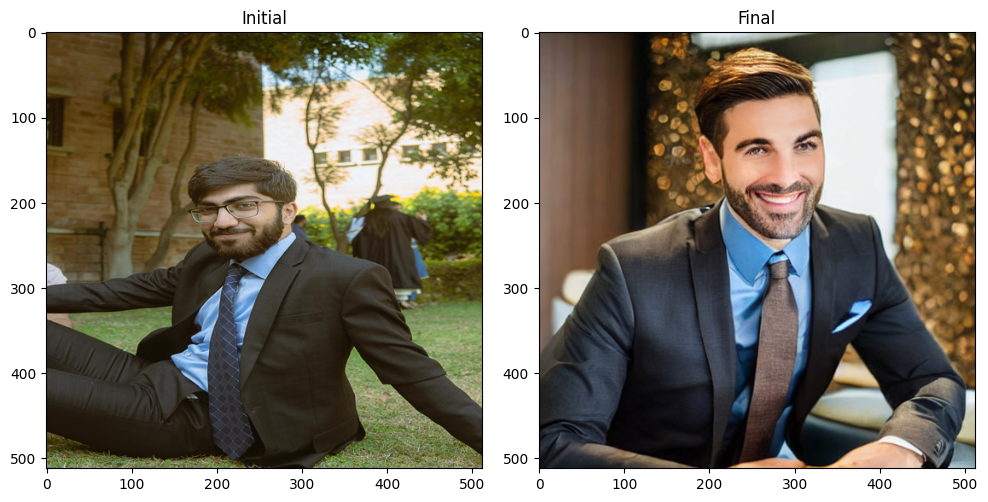

<Figure size 640x480 with 0 Axes>

In [ ]:
# uploading image
init_image = Image.open("/content/drive/MyDrive/Devsort/AI Headshots/images/DSC00061.jpg")
init_image = init_image.resize((512, 512))

prompt = "man face with blue background, good posture, smiling, professional photograph, plain background, good lighting, high quality"
negative_prompt = "disfigured, ugly, bad, immature, catoon, anime, 3d, painting, bnw, double images, not plain background"

# pass prompt and image to pipeline
images = []

# plt.imshow(images[0])

image = pipe(prompt, negative_prompt=negative_prompt, strength = 0.8, generator= generator, image=init_image).images[0]
images.append(image)
titles = ['Initial', 'Final']
plotgrid(images, titles, 1, 2, False, 'SD V1.5.png')



LORA N0.2, Linkedin Profile


In [5]:
# using SD V1.5 as base model first
from diffusers import AutoPipelineForImage2Image

# base model
model_id = "runwayml/stable-diffusion-v1-5"
pipe = AutoPipelineForImage2Image.from_pretrained(
    model_id, torch_dtype=torch.float16, variant="fp16", use_safetensors=True
)
pipe.enable_model_cpu_offload()

# download LoRA weights
lora_path = '/content/drive/MyDrive/Devsort/AI Headshots/models'
# load LoRA weights
pipe.load_lora_weights(lora_path, weight_name="LKDN-Male.safetensors")



/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

model.fp16.safetensors:   0%|          | 0.00/608M [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.72k [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/1.72G [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [6]:
# Set a random seed
generator = torch.manual_seed(0)

  0%|          | 0/40 [00:00<?, ?it/s]

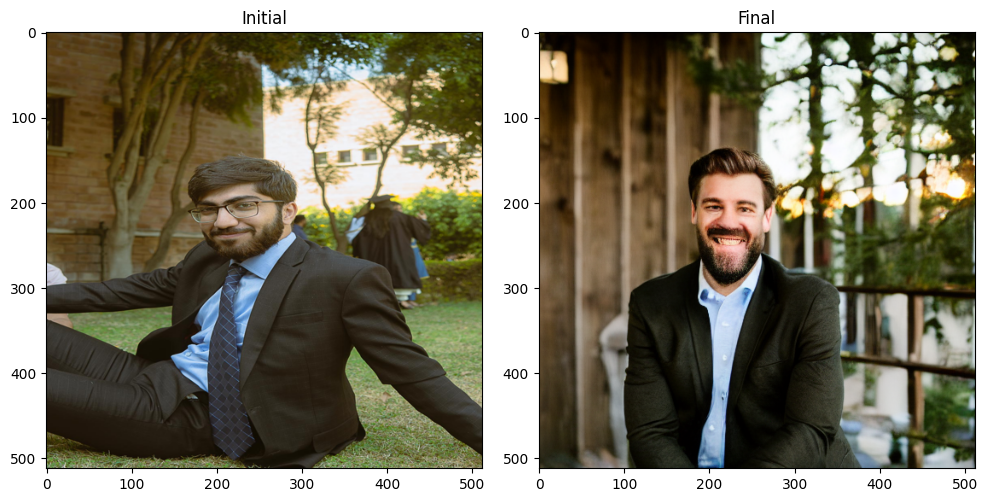

<Figure size 640x480 with 0 Axes>

In [9]:
# uploading image
init_image = Image.open("/content/drive/MyDrive/Devsort/AI Headshots/images/tests/DSC00061.jpg")
init_image = init_image.resize((512, 512))

prompt = "man face with blue background, good posture, smiling, professional photograph, plain background, good lighting, high quality"
negative_prompt = "disfigured, ugly, bad, immature, catoon, anime, 3d, painting, bnw, double images, not plain background"

# pass prompt and image to pipeline
images = []
images.append(init_image)

# plt.imshow(images[0])

image = pipe(prompt, negative_prompt=negative_prompt, strength = 0.8, generator= generator, image=init_image).images[0]
images.append(image)
titles = ['Initial', 'Final']
plotgrid(images, titles, 1, 2, False, 'Linkedin.png')
